# Ecuaciones de Euler de la rotación | Engranaje desalineado con eje

[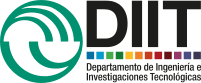](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2023 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Enunciado
El engranaje de la figura tiene una masa de $10\,\mathrm{kg}$ y está montado con una inclinación de $10^o$ al eje de masa despreciable sujeto por los cojinetes $A$ y $B$.
El cojinete $A$ es de empuje, por lo que provee reacción también en la dirección longitudinal al eje en tanto que el $B$ solo lo hace en las direcciones transversales.
Los momentos de inercia del engranaje son $I_z = 0,1\,\mathrm{kg \, m^2}$ y el $I_y = 0,05\,\mathrm{kg \, m^2}$.
El eje gira con velocidad angular constante.
1. Determine las reacciones que deben proveer los cojinetes.

![](figuras/hibb21_4.png "engranaje")  

## Ecuaciones de Euler-Lagrange para la rotación del engranaje

Las tres ecuaciones para sendas coordenadas en la terna $i, j, k$
$$
(I_j - I_k) \Omega_j \Omega_k - I_i \dot{\Omega}_i + \tau_i = 0
$$
se aplicarlan al sistema de ejes que se determine más adecuado para el análisis.

Para **el engranaje estas son las x, y, z minúsculas alineadas con la pieza** y en la cuál esta presenta simetría geométrica:
$$
\left\{
\begin{aligned}
(I_y - I_z) \Omega_y \Omega_z - I_x \frac{d \Omega_x}{d t} + \tau_x &= 0\\
(I_z - I_x) \Omega_z \Omega_x - I_y \frac{d \Omega_y}{d t} + \tau_y &= 0\\
(I_x - I_y) \Omega_x \Omega_y - I_z \frac{d \Omega_z}{d t} + \tau_z &= 0
\end{aligned}
\right.
$$

Hay que determinar en este sistema de coordenadas los
- momentos de inercia $I_i$
- componentes de velocidad, $\Omega_i$, y aceleración angular de rotación, $\dot{\Omega}_i$ 
- componentes de torque $\tau_i$

## Momentos de inercia $I_i$
El enunciado informa las magnitudes de $I_y$ e $I_z$ para el engranaje.

Para conocer $I_z$ basta recordar que para un cuerpo plano, como estamos considerando al engranaje, $I_z = I_x + I_y$ (ver expresión 32.10 del libro de Landau).

Además por la simetría geométrica del engranaje es claro que $I_x = I_y$.

## Componentes de velocidades $\Omega_i$ y aceleraciones $\dot{\Omega}_i$ angulares 
El enunciado nos informa que
- hay una única $\vec{\Omega} = \omega \hat{Z} = 30 \mathrm{s^{-1}} \hat{Z}$, sobre el eje
- no hay $\dot{\vec{\Omega}}$ pues $\vec{\Omega}$ es constante y por tanto todas las componentes de aceleración son nulas $\dot{\Omega}_i \equiv 0$

Como **la ecuación de Euler-Lagrange se escribirá en el sistema alineado con el engranaje (x,y,z)** hay que descomponer $\vec{\Omega}$.
Para esto basta con la **proyección del $\hat{Z}$** en este sistema
$$
\hat{Z} = \cos{\theta} \hat{z} + \sin{\theta} \hat{y}
$$
donde $\theta = -10^o \times \frac{\pi}{180^o}$

Resultan las $\Omega_i$
$$
\begin{aligned}
\Omega_y &= \omega \sin{\theta}\\
\Omega_z &= \omega \cos{\theta}
\end{aligned}
$$

Idéntico resultado se obtiene de plantear $\vec{\Omega}$ en el sistema alineado con el eje

In [1]:
# biblioteca de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales

In [2]:
omega =  sym.Symbol('omega')
Omega_XYZ = sym.Eq(sym.Symbol(r'\vec{\Omega}_{XYZ}') ,
                               sym.Matrix([0, 0, omega]) ,
                               evaluate=False)
Omega_XYZ

                     ⎡0⎤
                     ⎢ ⎥
\vec{\Omega}_{XYZ} = ⎢0⎥
                     ⎢ ⎥
                     ⎣ω⎦

y operar sobre este vector con la correspondiente matriz de rotación.

Al sistema de coordenadas alineado con al eje, el que se denota con mayúsculas, le llamamos sistema __M__.
Para el alineado con el engranaje utilizaremos el __m__ que definiremos girando $\theta$ en torno al eje $\hat{X}$ del sistema M.

In [3]:
# Sistemas cartesianos
M = sym.physics.vector.ReferenceFrame('M')
theta, omega =  sym.symbols('theta omega')
m = M.orientnew('m', 'Axis', [theta, M.x]) # creo el nuevo sistema rotando en torno eje x del sistema M (viejo)

La matriz de rotación en torno del eje $\hat{X}$ en $\theta$ es

In [4]:
m.dcm(M)

⎡1     0       0   ⎤
⎢                  ⎥
⎢0  cos(θ)   sin(θ)⎥
⎢                  ⎥
⎣0  -sin(θ)  cos(θ)⎦

con la que se obtiene

In [5]:
Omega_xyz = sym.Eq( sym.Symbol(r'\vec{\Omega}_{xyz}') ,
                   sym.MatMul(m.dcm(M), Omega_XYZ.rhs) ,
                   evaluate = False
                  )
Omega_xyz

                     ⎡1     0       0   ⎤ ⎡0⎤
                     ⎢                  ⎥ ⎢ ⎥
\vec{\Omega}_{xyz} = ⎢0  cos(θ)   sin(θ)⎥⋅⎢0⎥
                     ⎢                  ⎥ ⎢ ⎥
                     ⎣0  -sin(θ)  cos(θ)⎦ ⎣ω⎦

In [6]:
sym.Eq(Omega_xyz.lhs, Omega_xyz.rhs.doit(), evaluate= False )

                     ⎡   0    ⎤
                     ⎢        ⎥
\vec{\Omega}_{xyz} = ⎢ω⋅sin(θ)⎥
                     ⎢        ⎥
                     ⎣ω⋅cos(θ)⎦

El módulo de mecánica de `sympy` tiene una función para hacer todo lo anterior en un sólo paso.
Basta expresar el vector en el sistema rotado, $m$.

In [7]:
Omega_XYZ_vector = omega* M.z # el vector en el sistema original XYZ
Omega_xyz = sym.Eq(sym.Symbol(r'\vec{\Omega}_{xyz}') , 
                   Omega_XYZ_vector.to_matrix(m) , # lo escribe como matríz en el sistema rotado, N
                   evaluate = False )
Omega_xyz

                     ⎡   0    ⎤
                     ⎢        ⎥
\vec{\Omega}_{xyz} = ⎢ω⋅sin(θ)⎥
                     ⎢        ⎥
                     ⎣ω⋅cos(θ)⎦

Inclusive veremos más adelante que pueden hacerse operaciones, como productos vectoriales y escalares, entre vectores y versores en ambos sistemas de referencia.
El módulo `mechanics` se encarga de calcular las proyecciones.

No es necesario trabajar en notación matricial.
La utilizamos en este primer ejemplo porque muestran los resultados en forma ordenada, pero no son imprescindibles.

## Componentes del torque $\tau_i$
Para calcular los torques hay que determinar
- fuerzas aplicadas en el sistema mecánico
- posición en que estas se aplican respecto al punto de donde se calcula el torque

### Fuerzas sobre el sistema
Además de la fuerza peso que se considera actua sobre el centro del engranaje, punto $G$, hay que descomponer las reacciones en los cojinetes $A$ y $B$.
Estas componentes $A_i$ y $B_i$ se muestra esquemáticamente en la figura siguiente.

![](figuras/hibb21_4_res.png "descomposición de reacciones")  

### Torque en el sistema alineado al eje

Calculamos el torque respecto al punto $G$ que el del centro del engranaje $\vec{\tau}_G$ debido a las reacciones.

Las reacciones propuestas están planteadas en un sistema alineado al eje:
- En $A$, $F_{A} = A_x \hat{X} + A_y \hat{Y} + A_z \hat{Z}$
- En $B$, $F_{B} = B_x \hat{X} + B_y \hat{Y}$

En ese sistema los puntos en que ejercen las reacciones se expresan desde el centro del engranaje $G$ al
- punto $A$ hay un $\vec{r}_{\overline{GA}} = d_{GA} \hat{Z} = 0.2\,\mathrm{m} \hat{Z}$
- punto $B$ hay un $\vec{r}_{\overline{GB}} = - d_{GB} \hat{Z} = - 0.25\,\mathrm{m} \hat{Z}$

El torque respecto a un punto es función de las fuerzas aplicadas y la posición a él en que se aplican:
$$
\begin{aligned}
\vec{\tau}_G = \sum_i \vec{r}_i \times \vec{F}_i 
= \vec{r}_{\overline{GA}} \times \vec{F}_A
&+ \vec{r}_{\overline{GB}} \times \vec{F}_B \\
= \vec{r}_{\overline{GA}} \times \left( A_X \hat{X} + A_Y \hat{Y} + A_Z \hat{Z} \right)
 &+ \vec{r}_{\overline{GB}} \times \left( B_X \hat{X} + B_Y \hat{Y} \right) \\
= \left( \vec{r}_{\overline{GA}} \times A_X \hat{X} \right) + \left( \vec{r}_{\overline{GA}} \times A_Y \hat{Y} \right)
 &+ \left( \vec{r}_{\overline{GB}} \times B_X \hat{X} \right) + \left( \vec{r}_{\overline{GB}} \times B_Y \hat{Y} \right) \\
= \left( d_{GA} A_X \hat{Y} \right) + \left( - d_{GA} A_Y \hat{X} \right)
 &+ \left( - d_{GB} B_X \hat{Y} \right) + \left( d_{GB} B_Y \hat{X} \right) \\
= \left( - d_{GA} A_Y + d_{GB} B_Y \right) \hat{X}
 &+ \left( d_{GA} A_X - d_{GB} B_X  \right) \hat{Y} \\
\end{aligned}
$$

Lo mismo podemos hacer en `sympy`

In [8]:
# las fuerzas de reacción de los cojinetes
Ax, Ay, Az, Bx, By = sym.symbols('A_X A_Y A_Z B_X B_Y')
F_A = Ax* M.x + Ay* M.y + Az* M.z
F_B = Bx* M.x + By* M.y

In [9]:
# distancias engranaje a cojinetes
d_GA, d_GB =  sym.symbols('d_{GA} d_{GB}')
r_GA = d_GA* M.z
r_GB = d_GB* (-M.z)

Y luego calcular $\vec{\tau}_G = \vec{r}_{\overline{GA}} \times \vec{F}_A + \vec{r}_{\overline{GB}} \times \vec{F}_B$

In [10]:
# el torque en el sistema M
tau_G_XYZ_vector = r_GA.cross(F_A) + r_GB.cross(F_B)
tau_G_XYZ = sym.Eq(sym.Symbol(r'\vec{\tau}_{G,\,XYZ}') ,
                   tau_G_XYZ_vector.to_matrix(M) ,
                   evaluate = False )
tau_G_XYZ

                       ⎡-A_Y⋅d_{GA} + B_Y⋅d_{GB}⎤
                       ⎢                        ⎥
\vec{\tau}_{G,\,XYZ} = ⎢A_X⋅d_{GA} - B_X⋅d_{GB} ⎥
                       ⎢                        ⎥
                       ⎣           0            ⎦

## Torque en el sistema alineado al engranaje

Puede descomponerse $\vec{\tau}_G$ en los ejes $x,y,z$ en que el tensor de inercia se reduce a los momentos principales.

Usamos que
$$
\hat{X} = \hat{x}\\
\hat{Y} = \cos{\theta} \hat{y} - \sin{\theta} \hat{z}
$$


$$
\begin{aligned}
\vec{\tau}_G = \vec{r} \times \vec{F} 
&= \left( - d_{GA} A_Y + d_{GB} B_Y \right) \hat{x}
 + \left( d_{GA} A_X - d_{GB} B_X  \right) \left( \cos{\theta} \hat{y} - \sin{\theta} \hat{z} \right)\\
&= \left( - d_{GA} A_Y + d_{GB} B_Y \right) \hat{x}
 + \left( d_{GA} A_X - d_{GB} B_X  \right) \cos{\theta} \hat{y} 
 - \left( d_{GA} A_X - d_{GB} B_X  \right) \sin{\theta} \hat{z}\\
\end{aligned}
$$

Aplicando la matriz de rotación se obtiene igualmente el $\vec{\tau}_G$ en el sistema de eje del engranaje

In [11]:
tau_G_xyz = sym.Eq(sym.Symbol(r'\vec{\tau}_{G,\,xyz}') ,
                   tau_G_XYZ_vector.to_matrix(m) ,
                   evaluate = False )
tau_G_xyz

                       ⎡    -A_Y⋅d_{GA} + B_Y⋅d_{GB}     ⎤
                       ⎢                                 ⎥
\vec{\tau}_{G,\,xyz} = ⎢(A_X⋅d_{GA} - B_X⋅d_{GB})⋅cos(θ) ⎥
                       ⎢                                 ⎥
                       ⎣-(A_X⋅d_{GA} - B_X⋅d_{GB})⋅sin(θ)⎦

## Resolución del sistema de ecuaciones

### Ecuaciones de Euler-Lagrange

Con lo anterior el sistema a resolver se simplifica.

$$
\left\{
\begin{aligned}
(- I_y) \Omega_y \Omega_z + \tau_x &= 0\\
(I_y) \Omega_z \Omega_x + \tau_y &= 0\\
\tau_z &= 0
\end{aligned}
\right.
$$

En el eje $x$

$$
\begin{aligned}
I_x \dot{\Omega}_x - (I_y - I_z) \Omega_y \Omega_z & = \tau_x \\
I_y \omega^2 \cos{\theta} \sin{\theta} & = - d_{GA} A_Y + d_{GB} B_Y
\end{aligned}
$$
De aquí tenemos una relación ente $A_Y$ y $B_Y$ que no despejo aún.

Por los ejes $y,z$

$$
\begin{aligned}
I_y \dot{\Omega}_y - (I_z - I_x) \Omega_z \Omega_x & = \tau_y \\
- I_y \Omega_z \Omega_x & = \tau_y \\
- I_y \omega^2 \cos{\theta} \sin{\theta} & = - d_{GA} A_Y + d_{GB} B_Y
\end{aligned}
$$

$$
\begin{aligned}
I_z \dot{\Omega}_z - (I_x - I_y) \Omega_x \Omega_y & = \tau_z \\
0 & = \left( d_{GA} A_X - d_{GB} B_X  \right) \sin{\theta}
\end{aligned}
$$

Nuevamente esto puede calcularlo `sympy`.
En particular los $\Omega_i$ en el sistema alineado con el engranaje (x,y,z minúsculas) se calculan haciendo el producto escalar de $\vec{\Omega}$ con los versores de este sistema.
No importa en que sistema se definió $\vec{\Omega}$, el módulo `mechanics` se encarga de realizar las proyecciones correspondientes.

In [12]:
I_y_simbolo = sym.Symbol('I_y')
x_EL = sym.Eq( - I_y_simbolo * Omega_XYZ_vector.dot(M.y) * Omega_XYZ_vector.dot(M.z) + tau_G_xyz.rhs[0], 0)
y_EL = sym.Eq( I_y_simbolo * Omega_XYZ_vector.dot(M.z) * Omega_XYZ_vector.dot(M.x) + tau_G_xyz.rhs[1], 0)
z_EL = sym.Eq( tau_G_xyz.rhs[2], 0, evaluate= False)
sistema_EL = [x_EL, y_EL, z_EL]
sistema_EL

De esta última se obtiene

$$
B_X = \frac{d_{GA}}{d_{GB}} = \frac{0,2\,\mathrm{m}}{0,25\,\mathrm{m}} A_X = \frac{4}{5} A_X
$$

### 2.a ley de Newton

Además de estas ecuaciones se dispone de las tres ecuaciones de la 2.a ley de Newton para los tres ejes del sistema solidario al eje ($X,Y,Z$).

$$
\left\{
\begin{aligned}
A_X + B_X &= m a_X = 0\\
A_Y + B_Y - m g &= m a_Y = 0\\
A_Z &= m a_Z = 0
\end{aligned}
\right.
$$
donde $a_X = a_Y = 0$ pues para eso están los cojinetes.
En tanto que $a_Z = 0$ es _una corazonada_ pues no tenemos datos al respecto, pero es lo razonable si se espera que el eje no se salga de los cojinetes.

In [13]:
m, g = sym.symbols('m, g')
x_Newton = sym.Eq(Ax + Bx, 0)
y_Newton = sym.Eq(Ay + By - m* g, 0)
z_Newton = sym.Eq(Az, 0)
sistema_Newton = [x_Newton, y_Newton, z_Newton]
sistema_Newton

### Cálculo de las fuerzas de reacción del cojinete

Con las ecuaciones de la 2.a ley de Newton se puede continuar la resolución.

$$
A_X + B_X = m a_X = 0\\
A_Y + B_Y = m a_Y = m g\\
A_Z = m a_Z = 0 \implies A_Z = 0
$$
Si $A_X$ e $B_X$ deben cumplir simultáneamente que $A_X + B_X = 0$ y $B_X = \frac{4}{5} A_X \implies \boxed{A_X = 0, B_X =0}$. 

Queda obtener $A_Y$ y $B_Y$ sabiendo que

$$
mg = A_Y + B_Y
$$
y 

$$
\begin{aligned}
- I_y \omega^2 \cos{\theta} \sin{\theta} 
&= - d_{GA} A_Y + d_{GB} B_Y\\
-0.05 \mathrm{\, kg \, m^2} \, 900\,\mathrm{s^{-2}} \cos{\theta} \sin{\theta}
&= - 0,2\,\mathrm{m} A_Y + 0,25\,\mathrm{m} B_Y
\end{aligned}
$$
Con un poco de álgebra se obtiene $\boxed{ A_Y \simeq ?\,\mathrm{N}, B_Y \simeq ?\,\mathrm{N} }$, siendo estas las únicas componentes no nulas de reacción en los cojinetes.

Este sistema de las
- ecuaciones de Euler-Lagrange para la rotación
- 2.a ley de Newton  

podía resolverse con `sympy`

In [26]:
variablesDespeje = [Ax, Ay, Bx, By]
sistemaEcuaciones = sistema_Newton + sistema_EL

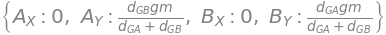

In [27]:
variblesDespeje_sol= sym.solve(sistemaEcuaciones, variablesDespeje )
variblesDespeje_sol # esto es un diccionario

Se utilizó `solve` para resolver este sistema de ecuaciónes. Este es solo uno de los algoritmos de los que dispone `sympy` para resolver sistemas. En la documentación de `Sympy` la sección [Solvers](https://docs.sympy.org/latest/modules/solvers/solvers.html#module-sympy.solvers) enumera las alternativas.

In [16]:
keys = variblesDespeje_sol.keys() # esto entrega los indices del diccionario
keys

dict_keys([A_X, A_Y, B_X, B_Y])

Con lo siguiente podemos escribir ecuaciones praa cada uno de los indices del diccionario.

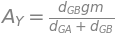

In [17]:
variable = Ay
ec_variable = sym.Eq(variable, variblesDespeje_sol[variable] )
ec_variable

Guardamos este resultado en una variable cuyo nombre nos recuerde de que se trata de lo despejado para $A_Y$.

In [18]:
Ay_despejado = ec_variable

Vimos en los resultados que solo nos falta calcular $B_Y$.

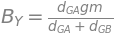

In [19]:
variable = By
ec_variable = sym.Eq(variable, variblesDespeje_sol[variable] )
ec_variable

In [20]:
By_despejado = ec_variable

Para obtener el valor numérico de lo despejado se crea un diccionario con los parámetros físicos del sistema.

In [21]:
parámetros = {
    I_y_simbolo : 0.05 , # [kg m2]
    d_GA : 0.2 , # [m]
    d_GB : 0.25 , # [m]
    theta : -10* sym.pi/180 , # [rad]
    omega : 30 , # [rad s-1]
    m : 10 , # [kg]
    g : 9.81 , # [m s-2]
}

In [22]:
Ay_despejado.subs(parámetros)

Puesto que al definir valores en el diccionario parámetros se usaron las unidades base del sistema internacional (SI) estas fuerzas están expresadas en Newtons (N).

In [23]:
By_despejado.subs(parámetros)